# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png)  Naive Bayes Lab
Week 8 | Lab 2.2

In [1]:
from sklearn import naive_bayes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split


### Load the data 

We're going to use The Adult Income Dataset on the UCI Machine Learning Repository; taken from US Census information and formatted to study the features/regressors/predictors that go into determining whether an adult US resident is 'likely' to have a household income greater than \$50,000. The data includes age, workclass, a weighting variable to account for the unbalanced sampling, education level, time spent in education (in years), marital status, occupation, relationship, race, sex, individual residency, and a target column that indicates whether the person attained a household income greater than \$50,000.

Load the adult data set. There are no column labels in the csv. I've assigned them for you here but you should read the docs for the data set here: https://archive.ics.uci.edu/ml/datasets/adult, and check that makes sense (there seem to be some issues accessing UCI website lately so that's why I've set the columns here so you don't have to check if it isn't working).

In [ ]:
adult_dat = pd.read_csv("./assets/datasets/adult_data.csv", names=["Age", "Workclass", "fnlwgt", 
                                                                   "Education", "Education-Num", "Martial Status",
                                                                    "Occupation", "Relationship", "Race", "Sex", 
                                                                   "Capital Gain", "Capital Loss", 
                                                                   "Hours per week", "Country", "Target"])
adult_dat.head()

### Convert the categorical variables into unordered integer values

For us to use the scikit-learn implementation of Naive Bayes, we must pass in numerical data. Since we have decided to analyse all unordered categorical values, we can do a dummy encoding (could also do one-hot-encoding, take a look at the docs if you are interested).

In [ ]:
Sex = pd.get_dummies(adult_dat['Sex'], drop_first=True)
Workclass = pd.get_dummies(adult_dat['Workclass'], drop_first=True) 
Marital = pd.get_dummies(adult_dat['Martial Status'], drop_first=True)
Occupation = pd.get_dummies(adult_dat['Occupation'], drop_first=True)
Relationship = pd.get_dummies(adult_dat['Relationship'], drop_first=True)
Race = pd.get_dummies(adult_dat['Race'], drop_first=True)
Country = pd.get_dummies(adult_dat['Country'], drop_first=True)
Target = pd.get_dummies(adult_dat['Target'], drop_first=True)

# Clean up the data set by deleting un-used columns

one_hot_dat = pd.concat([adult_dat, Sex, Workclass, Marital, Occupation, Relationship, Race, Country, Target], axis = 1)
del one_hot_dat['Sex']; del one_hot_dat['Age']; del one_hot_dat['Workclass']; del one_hot_dat['fnlwgt']; 
del one_hot_dat['Education']; del one_hot_dat['Education-Num']; del one_hot_dat['Martial Status']
del one_hot_dat['Occupation']; del one_hot_dat['Relationship']; del one_hot_dat['Race']; del one_hot_dat['Capital Gain']
del one_hot_dat['Capital Loss']; del one_hot_dat['Hours per week']; del one_hot_dat['Country'];
del one_hot_dat['Target']
one_hot_dat.head()

### Summarise the data and engage in elementary data exploration

For some data exploration, use Pandas histogram methods to display the features. 

In [ ]:
# Write histogram functions here, and/or any other data visualizations

### Define your feature set and define your target, including train-test split

In [ ]:
partition_val = np.random.rand(len(one_hot_dat)) < 0.70
train = one_hot_dat[partition_val]
test = one_hot_dat[~partition_val]
target_train = train[' >50K']
feature_train = train.drop(' >50K', axis=1)

### Run Naive Bayes Classifier

Instantiate the Naive Bayes predictor from scikit-learn with the training data. Which sklearn implementation makes sense for this data? Have a look at the docs.

In [ ]:
cat_Naive_Bayes = naive_bayes.BernoulliNB();
cat_Naive_Bayes.fit(feature_train, target_train)

### Check Accuracy / Score for Naive Bayes

Define the target and feature set for the test data

In [ ]:
target_test = test[' >50K']
feature_test =  test.drop(' >50K', axis = 1)

Score the Naive Bayes classifier on the test data

In [ ]:
cat_Naive_Bayes.score(feature_test, target_test)

### Check Accuracy / Score for a Logistic Classifier 

Define a logistic regression and train it with the feature and target set

In [ ]:
import sklearn.linear_model as linear_model

logistic_class = linear_model.LogisticRegression()
logit = logistic_class.fit(feature_train, target_train)

Produce the accuracy score of the logistic regression from the test set

In [ ]:
logit.score(feature_test, target_test)

We find in this case that e.g. logistic regression outperforms the Naive Bayes on accuracy, but we should think a bit more about what the best metrics are to assess our models. Have a think and play around with some metrics. Let's  also look at a case where Naive Bayes
has typically been found to do very well; text classification with bag-of-words and we can investigate the relative performance of different classifications a bit more.

## Text classification case and comparison assessment of classifiers

In [4]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import roc_curve

# vectorizer
# try others to see the effect
from sklearn.feature_extraction.text import CountVectorizer

# our classifiers to test
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier



In [5]:
#Import data. You can start with 20 news groups with 2 clearly separated categories. 
#I've also put in a spam dataset so you can compare that case

corpus=pd.read_csv("../assets/datasets/SMSSpamCollection.txt", sep="\t", header=None, encoding="utf-8")
corpus.columns=["classification", "text"]
X=corpus["text"]
y=corpus["classification"]
mapping={"ham":0, "spam":1}
y=y.map(mapping)


In [6]:
# Here are four categories but change as you wish and/or use the spam data (so two categories)
# ROC curve is a nice way to assess the model for the two category case
#  (you can explore all the categories if you pull
# in the whole of the fetch_20newsgroups)
"""
categories = [
    'alt.atheism',
    'sci.space'
    
]

data_train = fetch_20newsgroups(subset='train', categories=categories,
        shuffle=True, random_state=42)

data_test = fetch_20newsgroups(subset='test', categories=categories,
        shuffle=True, random_state=42)

categories = data_train.target_names
"""

"\ncategories = [\n    'alt.atheism',\n    'sci.space'\n    \n]\n\ndata_train = fetch_20newsgroups(subset='train', categories=categories,\n        shuffle=True, random_state=42)\n\ndata_test = fetch_20newsgroups(subset='test', categories=categories,\n        shuffle=True, random_state=42)\n\ncategories = data_train.target_names\n"

In [7]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [8]:
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [9]:
# Put your vectorizer here but note: for reasons of run 
# time you should set a max_features or n_features (eg 1000)
"""
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_train = vectorizer.fit_transform(data_train.data)
X_test = vectorizer.transform(data_test.data)

y_train = data_train.target
y_test = data_test.target
"""

"\nvectorizer = CountVectorizer(stop_words='english', max_features=1000)\nX_train = vectorizer.fit_transform(data_train.data)\nX_test = vectorizer.transform(data_test.data)\n\ny_train = data_train.target\ny_test = data_test.target\n"

In [10]:
# Note I set a binarize cutoff for the Bernoulli case, so that if a word
# appears once I count it otherwise 0 (could change this)

clfs = [
    ("MultinomialNB", MultinomialNB()),
    ("BernoulliNB", BernoulliNB(binarize=1)),
    ("KNeighborsClassifier", KNeighborsClassifier()),
    ("RandomForestClassifier", RandomForestClassifier()),
    ("SVM", SVC(probability=True))
]

all_results = None
for name, clf in clfs:
    clf.fit(X_train.todense(), y_train)
    probs = clf.predict_proba(X_test.todense())[:,1]
    fpr, tpr, thresh = roc_curve(y_test, probs)
    results = pd.DataFrame({
        "name": name,
        "fpr": fpr,
        "tpr": tpr
    })
    if all_results is None:
        all_results = results
    else:
        all_results = all_results.append(results)

name_mapping={"MultinomialNB":1, "BernoulliNB":2, "KNeighborsClassifier":3, "RandomForestClassifier":4, "SVM":5}
all_results["name2"]=all_results["name"].map(name_mapping)

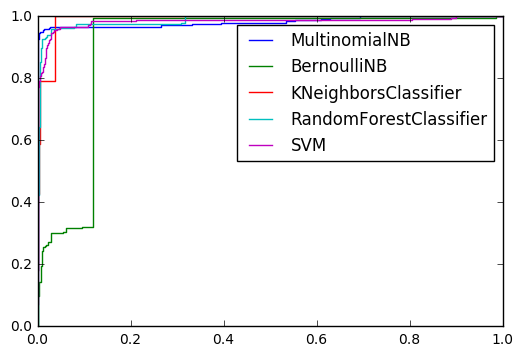

In [11]:
# Roc curves (I used the .step plot here rather than .plot, that seems to make more sense
# although the sklearn documentation uses .plot)

for entry in range(1,max(all_results["name2"])+1,1):
    results=all_results.loc[all_results["name2"]==entry,:]
    plt.step(results['fpr'], results['tpr'], label=results["name"].iloc[0])
plt.legend()
plt.show()


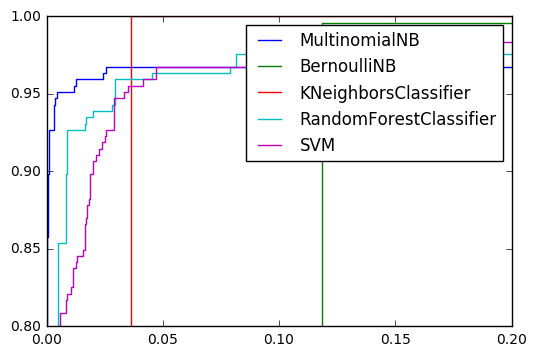

In [12]:
# Zoom in
# MultinomialNB looks good

for entry in range(1,max(all_results["name2"])+1,1):
    results=all_results.loc[all_results["name2"]==entry,:]
    plt.step(results['fpr'], results['tpr'], label=results["name"].iloc[0])
plt.legend()
plt.xlim([0,0.2])
plt.ylim([0.8,1])
plt.show()